In [112]:
import time, random
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
#from scipy import stats
from scipy.optimize import curve_fit

zad2


In [98]:
class BinHeap: 
    def __init__(self):
        self.heapList=[0]
        self.currentSize=0
    
    def percUp(self,i):
        while i//2 > 0: 
            if self.heapList[i]<self.heapList[i//2]:
                tmp=self.heapList[i//2]
                self.heapList[i//2]=self.heapList[i]
                self.heapList[i]=tmp
        i=i//2
                
    def insert(self,k):
        self.heapList.append(k)
        self.currentSize=self.currentSize+1
        self.percUp(self.currentSize)

    def findMin(self):
        return self.heapList[1]

    def percDown(self,i):  #complexity O(logn)  (?)
        while(i*2)<=self.currentSize:
            mc=self.minChild(i)
            if self.heapList[i]>self.heapList[mc]:
                tmp=self.heapList[i]
                self.heapList[i]=self.heapList[mc]
                self.heapList[mc]=tmp
            i=mc
            
    def minChild(self,i):
        if i*2+1>self.currentSize:
            return i*2 
        else:
            if self.heapList[i*2]<self.heapList[i*2+1]:
                return i*2 
            else: 
                return i*2+1 
                 
    def delMin(self):  #complexity przejmuje od percDown
        retval=self.heapList[1]
        self.heapList[1]=self.heapList[self.currentSize]
        self.currentSize=self.currentSize-1 
        self.heapList.pop()
        self.percDown(1)
        return retval

    def buildHeap(self,alist):  #complexity O(n) (?)
        i=len(alist)//2
        self.currentSize=len(alist)
        self.heapList=[0]+alist[:]
        while(i>0):
            self.percDown(i)
            i=i-1
            
    def size(self):
        return self.currentSize
        
    def isEmpty(self):
        return self.currentSize==0
        
    def __str__(self):
        txt="{}".format(self.heapList[1:])
        return txt

In [99]:
def sorting_binheap(elem): #elem - lista z liczbami do posotrowania
    
    if not isinstance(elem,list):
        return ValueError ('Given argument need to be a list')
    
    bn=BinHeap()
    bn.buildHeap(elem)
    result=[bn.delMin() for i in range(bn.size())]
    return result

In [100]:
sorting_binheap([5,3,11,33,2,4,1,55,51]) 

[1, 2, 3, 4, 5, 11, 33, 51, 55]

In [101]:
def sorting_binheap_time(elem): #elem - lista z liczbami do posotrowania
    
    if not isinstance(elem,list):
        return ValueError ('Given argument need to be a list')
    
    start=time.time()
    bn=BinHeap()
    bn.buildHeap(elem)
    result=[bn.delMin() for i in range(bn.size())]  #tutaj O(n)
    end=time.time()
    
    return result, end-start

In [102]:
sorting_binheap_time([5,3,11,33,2,4,1,55,51,100,20,30,40,5,10])

([1, 2, 3, 4, 5, 5, 10, 11, 20, 30, 33, 40, 51, 55, 100], 0.0)

randomowo dodaje liczby do kopca

In [182]:
def using_sbht(n:int,low=10000): #low liczba do której losowane są randomowe inty
    #zmienić to low na inną nazwę, bo przy random.randint() zmyla
    #arr=np.random.randint(low,size=n)
    arr=[random.randint(1,low) for i in range(n)]
    return sorting_binheap_time(arr)


plotuje czas wykonania sortowania dla n wielkiej tablicy

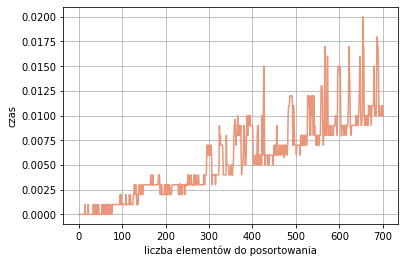

In [183]:
def ploting(n=700,low=10000):
    x = [i for i in range(0,n+1)]
    times = [using_sbht(i,low)[1] for i in x]
    plt.plot(x, times, 'darksalmon')
    plt.xlabel('liczba elementów do posortowania')
    plt.ylabel("czas")
    plt.grid()
    plt.show()
    
ploting()

In [193]:
def func(x, a,b):
    return a*x+b

def func2(x, a,b):
    return a*x*np.log2(x) +b

def func3(x, a,b,c):
    return a*x**2+b*x+c

def func4(x, a,b,c,d):
    return a*x**3+b*x*2+c*x+d

In [191]:
n=100  #here the same, just to check if it works
x = [i for i in range(0,n+1)]
times = [using_sbht(i,10)[1] for i in x]
popt, pcov = curve_fit(func3, x, times)
popt

array([ 2.01859422e-08,  8.69227074e-06, -3.09938573e-05])

In [129]:
n=1000  #just to check if it works
x = [i for i in range(0,n+1)]
times = [using_sbht(i,10)[1] for i in x]
popt, pcov = curve_fit(func, x, times) #dopasowuje f wielomianiową
popt

array([ 1.81291532e-05, -6.90916887e-04])

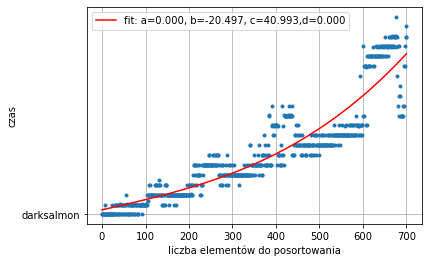

In [197]:
def ploting_with_curve(n=700,low=10000):
    
    x = np.array([i for i in range(0,n+1)])
    times = np.array([using_sbht(i,low)[1] for i in x])
    
    #slope = stats.linregress(np.log(x), np.log(times))[0]
    popt, pcov = curve_fit(func3, x, times)
    
    plt.plot(x, times,'.', 'darksalmon')
    plt.plot(x, func3(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    #plt.plot(x, times,'red', label='Wsp kierunkowy = %4f' % slope)
    
    plt.xlabel('liczba elementów do posortowania')
    plt.ylabel("czas")
    plt.legend()
    plt.grid()
    plt.show()
    
ploting_with_curve()

z innternetu algorytmy.
dopasowanie krzywej wychodzi również z wielomainu, a na stroncę o złożoności piszą coś takiego:
    "Time complexity:It takes O(logn) for heapify and O(n) for constructing a heap,
     Hence, the overall time complexity of heap sort using min heap or max heap is O(nlogn)"
     
więc ten mój algorytm też powinien być w porządku i też ta złożoność będzie jak od nas wymagają

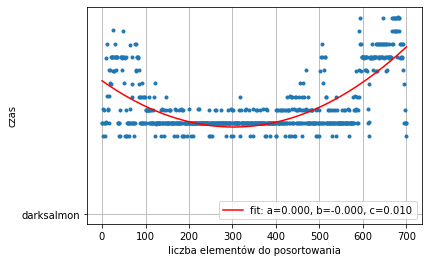

In [198]:
def heapify(arr, n, i):
    smallest = i 
    l = 2 * i + 1 # left = 2*i + 1
    r = 2 * i + 2 # right = 2*i + 2
    if l < n and arr[l] < arr[smallest]:
        smallest = l

    if r < n and arr[r] < arr[smallest]:
        smallest = r
 
    if smallest != i:
        (arr[i],arr[smallest]) = (arr[smallest],arr[i])
 
        heapify(arr, n, smallest)
 
 # main function to do heap sort
def heapSort(arr, n):
    start=time.time()
    for i in range(int(n / 2) - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n-1, -1, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)
    end=time.time()
    return arr,end-start

n=100
arr=[random.randint(1,1000) for i in range(n)]
heapSort(arr,len(arr))


def ploting_with2(n=700,low=10000):
    
    x = np.array([i for i in range(0,n+1)])
    arr=[random.randint(1,low) for i in range(n)]
    times=np.array([heapSort(arr,len(arr))[1] for i in x])
    #times = np.array([using_sbht(i,low)[1] for i in x])
    
    #slope = stats.linregress(np.log(x), np.log(times))[0]
    popt, pcov = curve_fit(func3, x, times)
    
    plt.plot(x, times,'.', 'darksalmon')
    plt.plot(x, func3(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    #plt.plot(x, times,'red', label='Wsp kierunkowy = %4f' % slope)
    
    plt.xlabel('liczba elementów do posortowania')
    plt.ylabel("czas")
    plt.legend()
    plt.grid()
    plt.show()
    
ploting_with2()

w n i o s e k :
czas trwania

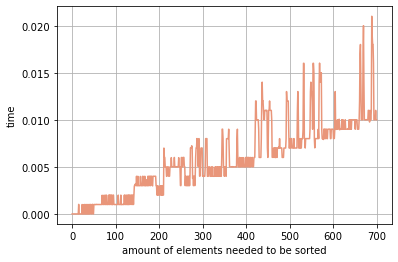

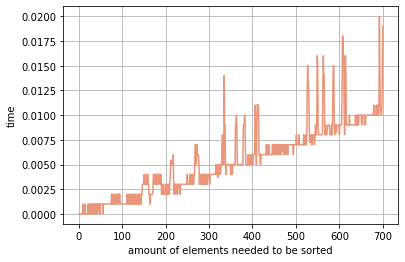

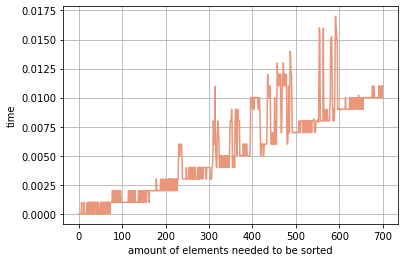

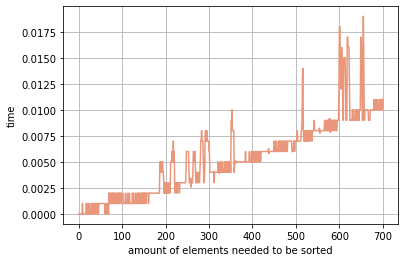

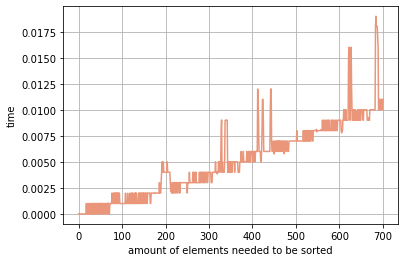

In [105]:
for i in range(5):
    ploting()

plotting
- mała ilość elementów w kopcu, z średnio dużymi wartościami: n=100, low=1000
- mała ilość elementów w kopcu, ale duże ich wartości: n=100, low=100000
- duża liczba elementów w kopcu, z małymi wartościami: n=100000, low=100
- duża liczba elementów w kopcu z dużymi wartościami: n=100000, low=100000

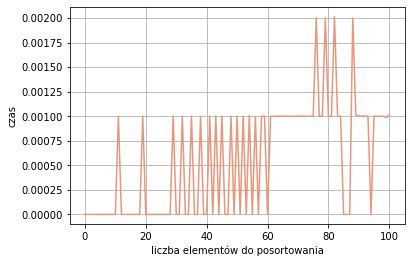

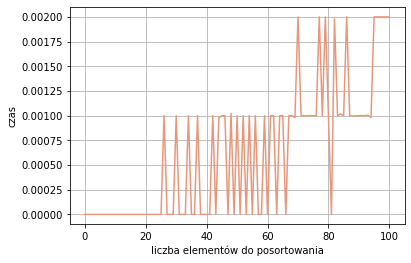

In [ ]:
data=[[100,1000],[100,100000],[100000,100],[100000,100000]]
for i,j in data:
    ploting(i,j)

w n i o s k i:
- dla małej ilości liczb w liście nieistotna jest wielkość arguementów
- wykres zależy o